# Import Library

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset

In [120]:
dataset=pd.read_csv('../Dataset/car data.csv')
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Exploration and Preprocessing [EDA]

In [121]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [122]:
# counting Rows and Columns
dataset.shape

(301, 9)

In [123]:
# Basic information about the dataset
print("\nBasic Information:")
print(dataset.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [124]:
print("\nSummary statistics:")
print(dataset.describe())


Summary statistics:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [125]:
print("Fuel_Type :",dataset['Fuel_Type'].unique())
print("Transmission :",dataset['Transmission'].unique())
print("Seller Type :",dataset['Seller_Type'].unique())

Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Transmission : ['Manual' 'Automatic']
Seller Type : ['Dealer' 'Individual']


In [126]:
# Missing Values
dataset.isnull().sum()

# if Any Missing Value is There 
# dataset['Present_Price'].fillna(dataset['Present_Price'].mean(),inplace=True)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [127]:
dataset=dataset.dropna()


In [128]:
dataset=pd.get_dummies(dataset,columns=['Fuel_Type','Seller_Type','Transmission'])
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,False,True,True,False,False,True
1,sx4,2013,4.75,9.54,43000,0,False,True,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,False,True,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,False,True,True,False,False,True
4,swift,2014,4.60,6.87,42450,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,False,True,False,True,False,False,True
297,brio,2015,4.00,5.90,60000,0,False,False,True,True,False,False,True
298,city,2009,3.35,11.00,87934,0,False,False,True,True,False,False,True
299,city,2017,11.50,12.50,9000,0,False,True,False,True,False,False,True


In [129]:
X = dataset[['Year', 'Present_Price', 'Kms_Driven','Owner','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Dealer','Seller_Type_Individual','Transmission_Automatic','Transmission_Manual']]
y = dataset['Selling_Price']

In [137]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# appling Model 

In [138]:
car_model=LinearRegression()
car_model.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred = car_model.predict(X_test)

# Evaluate Model

In [143]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f"mean_absolute_error :{mae:.2f}")
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 3.48
mean_absolute_error :1.22
R-squared: 0.85


# Visualize the model points

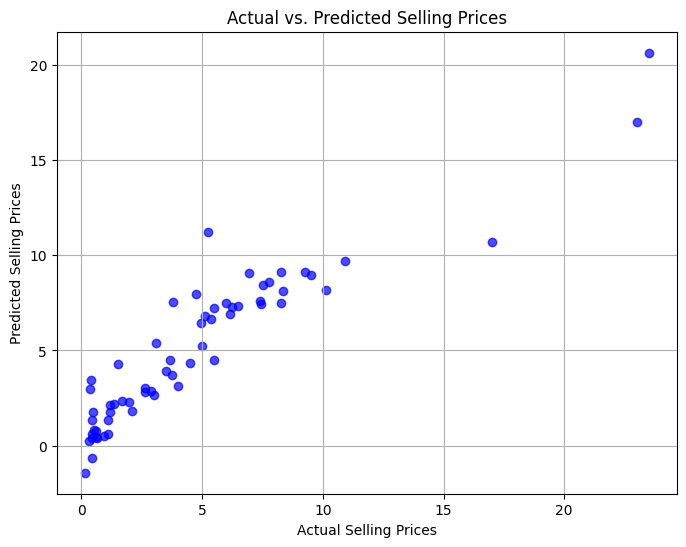

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs. Predicted Selling Prices')
plt.grid(True)
plt.show()

# Interpreperation

In [145]:

# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = car_model.coef_
intercept = car_model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
Year: 0.35
Present_Price: 0.43
Kms_Driven: -0.00
Owner: -0.90
Fuel_Type_CNG: -1.09
Fuel_Type_Diesel: 1.44
Fuel_Type_Petrol: -0.35
Seller_Type_Dealer: 0.60
Seller_Type_Individual: -0.60
Transmission_Automatic: 0.82
Transmission_Manual: -0.82
Intercept: -710.28


# Saving Model

In [158]:
import joblib
joblib.dump(car_model,'../Model/MLR_Car.pkl')

['../Model/MLR_Car.pkl']

# USer Testing

In [159]:
def get_user_input_for_car():
    # User inputs for car features
    year = int(input("Enter the car's manufacturing year: "))
    present_price = float(input("Enter the present price of the car (in lakhs): "))
    kms_driven = float(input("Enter the number of kilometers the car has driven: "))
    
    fuel_type = int(input("Enter fuel type (Petrol = 1 / Diesel = 0): "))
    fuel_type = 'Petrol' if fuel_type == 1 else 'Diesel'
    
    seller_type = int(input("Enter seller type (Dealer = 0 / Individual = 1): "))
    seller_type_Individual = 'Individual' if seller_type == 1 else 'Dealer'
    
    transmission = int(input("Enter transmission type (Manual = 1 / Automatic = 0): "))
    transmission_Manual = 'Manual' if transmission == 1 else 'Automatic'
    
    owner = int(input("Enter number of previous owners (0, 1, 2, etc.): "))

    # Organizing the data into a DataFrame
    input_data = {
        'Year': [year],
        'Present_Price': [present_price],
        'Kms_Driven': [kms_driven],
        'Fuel_Type': [fuel_type],
        'Seller_Type_Individual': [seller_type_Individual],
        'Transmission_Manual': [transmission_Manual],
        'Owner': [owner]
    }
    
    X = pd.DataFrame(input_data)
    X = pd.get_dummies(X, columns=['Fuel_Type', 'Seller_Type_Individual', 'Transmission_Manual'], drop_first=True)

    # Ensure the input features match the trained model's expected input columns
    missing_cols = set(X_train.columns) - set(X.columns)
    for col in missing_cols:
        X[col] = 0
    
    X = X[X_train.columns]  # Reorder columns to match training set
    
    # Making a prediction using the trained model
    y_pred = car_model.predict(X)
    
    print("\nCar Details:", X)
    print("\nPredicted Selling Price:", y_pred[0])

# Example usage of the function
get_user_input_for_car()


Car Details:    Year  Present_Price  Kms_Driven  Owner  Fuel_Type_CNG  Fuel_Type_Diesel  \
0  2015        45000.0     54545.0      0              0                 0   

   Fuel_Type_Petrol  Seller_Type_Dealer  Seller_Type_Individual  \
0                 0                   0                       0   

   Transmission_Automatic  Transmission_Manual  
0                       0                    0  

Predicted Selling Price: 19314.15936472675
